In [1]:
# attempt to read in LH sims and plot data.
import pandas as pd
import matplotlib as mpl
import matplotlib.colors as cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import os

/tmp/ipykernel_239/57903043.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import os
import pandas as pd

# Define the directory containing the LH_X files
directory = "/home/jovyan/camels/play/synth-play/LH/output/"

# Get all files in the directory
files = os.listdir(directory)

# Filter out files that start with "LH_" and end with ".txt"
LH_X_files = [file for file in files if file.startswith("LH_") and file.endswith(".txt")]

# Initialize lists to store data
phia = []
phi_sigmaa = []
binsa = []
LH_X_values = []

# Iterate over LH_X files
for LH_X_file in LH_X_files:
    # Define the file path
    file_path = os.path.join(directory, LH_X_file)
    
    # Extract LH_X value from the file name (remove the ".txt" extension)
    LH_X = LH_X_file[:-4]
    
    # Initialize an empty dictionary to store variable names and their values
    variable_data = {}

    # Open the text file for reading
    with open(file_path, 'r') as file:
        # Initialize variables to store the current variable name and its values
        current_variable_name = None
        current_variable_values = []

        # Iterate over each line in the file
        for line in file:
            # Remove leading and trailing whitespace from the line
            line = line.strip()

            # Check if the line is empty
            if not line:
                continue

            # Check if the line is a variable name
            if line in ['phi', 'phi_sigma', 'hist', 'massBinLimits']:
                # If it's a new variable name, update the current variable name and reset the values list
                if current_variable_name is not None:
                    variable_data[current_variable_name] = current_variable_values
                    current_variable_values = []

                current_variable_name = line
            else:
                # If it's not a variable name, convert the value to float and append it to the values list
                current_variable_values.append(float(line))

        # Add the last variable data to the dictionary
        if current_variable_name is not None:
            variable_data[current_variable_name] = current_variable_values
        
        # Extract specific variables
        phi = variable_data.get('phi')
        phi_sigma = variable_data.get('phi_sigma')
        bins = variable_data.get('massBinLimits')

        phia.append(phi)
        phi_sigmaa.append(phi_sigma)
        binsa.append(bins)
        LH_X_values.append(LH_X)

# Create a DataFrame from the lists
df = pd.DataFrame({'LH_X': LH_X_values, 'phi': phia, 'phi_sigma': phi_sigmaa, 'bins': binsa})

# Display the DataFrame
df


,LH_X,phi,phi_sigma,bins
0,LH_0,"[0.00015987453159307786, 0.0002213647360519539...","[4.434121702304844e-05, 5.217616865930228e-05,...","[-22.0, -21.5, -21.0, -20.5, -20.0, -19.5, -19..."
1,LH_1,"[1.2298040891775219e-05, 1.2298040891775219e-0...","[1.2298040891775219e-05, 1.2298040891775219e-0...","[-22.0, -21.5, -21.0, -20.5, -20.0, -19.5, -19..."
2,LH_10,"[0.0, 6.143559877543997e-05, 6.143559877543997...","[0.0, 2.7474835020057322e-05, 2.74748350200573...","[-22.0, -21.5, -21.0, -20.5, -20.0, -19.5, -19..."
3,LH_100,"[0.0, 1.2298040891775219e-05, 4.91921635671008...","[0.0, 1.2298040891775219e-05, 2.45960817835504...","[-22.0, -21.5, -21.0, -20.5, -20.0, -19.5, -19..."
4,LH_101,"[0.00016015885983260023, 0.0002094385090118618...","[4.442007548817616e-05, 5.079629968986957e-05,...","[-22.0, -21.5, -21.0, -20.5, -20.0, -19.5, -19..."
...,...,...,...,...
898,LH_995,"[1.2319912294815403e-05, 7.391947376889241e-05...","[1.2319912294815403e-05, 3.0177498798138694e-0...","[-22.0, -21.5, -21.0, -20.5, -20.0, -19.5, -19..."
899,LH_996,"[1.2319912294815403e-05, 7.391947376889241e-05...","[1.2319912294815403e-05, 3.0177498798138694e-0...","[-22.0, -21.5, -21.0, -20.5, -20.0, -19.5, -19..."
900,LH_997,"[1.2319912294815403e-05, 0.0, 8.62393860637078...","[1.2319912294815403e-05, 0.0, 3.25954241062086...","[-22.0, -21.5, -21.0, -20.5, -20.0, -19.5, -19..."
901,LH_998,"[0.0, 4.9192163567100876e-05, 9.83843271342017...","[0.0, 2.4596081783550438e-05, 3.47841124395348...","[-22.0, -21.5, -21.0, -20.5, -20.0, -19.5, -19..."


In [3]:
# Generate the list of expected filenames
expected_files = [f'LH_{i}' for i in range(1000)]

# Extract the filenames that are actually present in the DataFrame
present_files = df['LH_X'].tolist()

# Find the missing filenames
missing_files = set(expected_files) - set(present_files)

# If you want to print the missing files
print("Missing files:")
for file in sorted(missing_files):
    print(file)

Missing files:
LH_104
LH_177
LH_273
LH_274
LH_275
LH_276
LH_277
LH_278
LH_279
LH_280
LH_281
LH_282
LH_283
LH_284
LH_285
LH_286
LH_287
LH_288
LH_289
LH_290
LH_291
LH_292
LH_293
LH_294
LH_295
LH_296
LH_297
LH_298
LH_299
LH_339
LH_340
LH_341
LH_342
LH_343
LH_344
LH_345
LH_346
LH_347
LH_348
LH_349
LH_350
LH_351
LH_352
LH_353
LH_354
LH_355
LH_356
LH_357
LH_358
LH_359
LH_360
LH_361
LH_362
LH_363
LH_364
LH_365
LH_366
LH_367
LH_368
LH_369
LH_370
LH_371
LH_372
LH_373
LH_374
LH_375
LH_376
LH_377
LH_378
LH_379
LH_380
LH_381
LH_382
LH_383
LH_384
LH_385
LH_386
LH_387
LH_388
LH_389
LH_390
LH_391
LH_392
LH_393
LH_394
LH_395
LH_396
LH_397
LH_398
LH_399
LH_426
LH_466
LH_50
LH_513
LH_559
LH_630
LH_826


In [3]:
df['LH_X'].unique()

array(['LH_0', 'LH_1', 'LH_10', 'LH_100', 'LH_101', 'LH_102', 'LH_103',
       'LH_105', 'LH_106', 'LH_107', 'LH_108', 'LH_109', 'LH_11',
       'LH_110', 'LH_111', 'LH_112', 'LH_113', 'LH_114', 'LH_115',
       'LH_116', 'LH_117', 'LH_118', 'LH_119', 'LH_12', 'LH_120',
       'LH_121', 'LH_122', 'LH_123', 'LH_124', 'LH_125', 'LH_126',
       'LH_127', 'LH_128', 'LH_129', 'LH_13', 'LH_130', 'LH_131',
       'LH_132', 'LH_133', 'LH_134', 'LH_135', 'LH_136', 'LH_137',
       'LH_138', 'LH_139', 'LH_14', 'LH_140', 'LH_141', 'LH_142',
       'LH_143', 'LH_144', 'LH_145', 'LH_146', 'LH_147', 'LH_148',
       'LH_149', 'LH_15', 'LH_150', 'LH_151', 'LH_152', 'LH_153',
       'LH_154', 'LH_155', 'LH_156', 'LH_157', 'LH_158', 'LH_159',
       'LH_16', 'LH_160', 'LH_161', 'LH_162', 'LH_163', 'LH_164',
       'LH_165', 'LH_166', 'LH_167', 'LH_168', 'LH_169', 'LH_17',
       'LH_170', 'LH_171', 'LH_172', 'LH_173', 'LH_174', 'LH_175',
       'LH_176', 'LH_18', 'LH_19', 'LH_2', 'LH_20', 'LH_200', 'L

import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data

# Plot the luminosity function for each LH_X value
for i, row in df.iterrows():
    plt.errorbar(row['bins'], row['phi'], yerr=row['phi_sigma'], fmt='o', label=row['LH_X'])
    #plt.plot(row['bins'], row['phi'], label=row['LH_X'])

plt.xlabel('Mag [AB]')
plt.ylabel('$\Phi [Mpc^{-3} mag^{-1}]$')
plt.yscale('log')
plt.legend()  # Add legend

plt.title('Luminosity Function z=0.465')
plt.grid(True)

# Set the x-axis and y-axis limits
plt.xlim(-22, -17)  # Replace xmin and xmax with your desired limits for the x-axis
plt.ylim(1e-5,0)  
plt.show()


/tmp/ipykernel_8852/518003626.py:22: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(1e-5, 0)


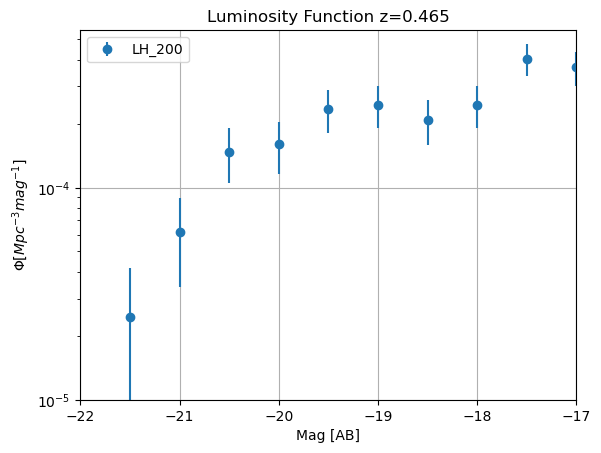

In [10]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# Filter for LH_X == 103
specific_row = df[df['LH_X'] == 'LH_200']

# Check if the specific row is found
if not specific_row.empty:
    row = specific_row.iloc[0]
    plt.errorbar(row['bins'], row['phi'], yerr=row['phi_sigma'], fmt='o', label=f'{row["LH_X"]}')
    
    plt.xlabel('Mag [AB]')
    plt.ylabel('$\Phi [Mpc^{-3} mag^{-1}]$')
    plt.yscale('log')
    plt.legend()  # Add legend

    plt.title('Luminosity Function z=0.465')
    plt.grid(True)

    # Set the x-axis and y-axis limits
    plt.xlim(-22, -17)  # Replace xmin and xmax with your desired limits for the x-axis
    plt.ylim(1e-5, 0)  
    plt.show()
else:
    print("No data found for LH_X == 103")
